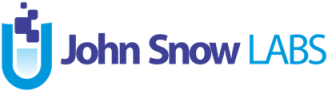

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/quac_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [4]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## QuAC
[QuAC: Question Answering in Context](https://aclanthology.org/D18-1241/)


**Dataset Summary**

- Question Answering in Context is a dataset for modeling, understanding, and participating in information seeking dialog. Data instances consist of an interactive dialog between two crowd workers: (1) a student who poses a sequence of freeform questions to learn as much as possible about a hidden Wikipedia text, and (2) a teacher who answers the questions by providing short excerpts (spans) from the text. QuAC introduces challenges not found in existing machine comprehension datasets: its questions are often more open-ended, unanswerable, or only meaningful within the dialog context.

**Data Splits**

- `test` -Testing set from the QuAC dataset with 1000 examples for modeling, understanding, and participating in information seeking dialog.

- `test-tiny`- Truncated version of the val set from the QuAC dataset with 50 examples.

### Setup and Configure Harness

In [5]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Quac",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [6]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [7]:
harness.data = harness.data[:10]

### Generating the test cases.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [9]:
harness.run()

Running testcases... : 100%|██████████| 50/50 [02:54<00:00,  3.48s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [10]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,"In May 1983, she married Nikos Karvelas, a com...",question1: what happened in 1983?\nquestion2: ...,"IN MAY 1983, SHE MARRIED NIKOS KARVELAS, A COM...",QUESTION1: WHAT HAPPENED IN 1983? QUESTION2: D...,"\n\nAnswer1: In May 1983, she married Nikos Ka...","\n\nAnswer1: In May 1983, she married Nikos Ka...",True
1,robustness,uppercase,"In September 2016 Vladimir Markin, official sp...",question1: Did they have any clues?\nquestion2...,"IN SEPTEMBER 2016 VLADIMIR MARKIN, OFFICIAL SP...",QUESTION1: DID THEY HAVE ANY CLUES? QUESTION2:...,"\n\nAnswer1: Yes, they had clues that the Russ...","\n\nAnswer1: Yes, they had clues that the Russ...",True
2,robustness,uppercase,Graham returned to the WWWF in April 1977 afte...,question1: Why did he return to the WWWF?\nque...,GRAHAM RETURNED TO THE WWWF IN APRIL 1977 AFTE...,QUESTION1: WHY DID HE RETURN TO THE WWWF? QUES...,\n\nAnswer1: Graham returned to the WWWF in Ap...,\n\nAnswer1: He returned to the WWWF in April ...,True
3,robustness,uppercase,In the early 1990s US federal agents were inve...,question1: what disputes did he have?\nquestio...,IN THE EARLY 1990S US FEDERAL AGENTS WERE INVE...,QUESTION1: WHAT DISPUTES DID HE HAVE? QUESTION...,\n\nAnswer1: Graham had disputes with Dr. Zaho...,\n\nAnswer1: Jim Graham had disputes with Dr. ...,True
4,robustness,uppercase,During the aftermath of the murder of Stefan P...,question1: How was Jack Thompson's related to ...,DURING THE AFTERMATH OF THE MURDER OF STEFAN P...,QUESTION1: HOW WAS JACK THOMPSON'S RELATED TO ...,\n\nAnswer1: Jack Thompson was hired by the Pa...,\n\nAnswer1: Jack Thompson was a lawyer hired ...,True
5,robustness,uppercase,"In the early 1990s, she continued performing a...",question1: What plays was she in?\nquestion2: ...,"IN THE EARLY 1990S, SHE CONTINUED PERFORMING A...",QUESTION1: WHAT PLAYS WAS SHE IN? QUESTION2: W...,\n\nAnswer1: She starred in the first Greek ro...,\n\nAnswer1: Anna Vissi starred in the Greek r...,True
6,robustness,uppercase,"In April 2010, along with actors Brian Cox and...",question1: What charity work did he do?\nquest...,"IN APRIL 2010, ALONG WITH ACTORS BRIAN COX AND...",QUESTION1: WHAT CHARITY WORK DID HE DO? QUESTI...,\n\nAnswer1: McKellen appeared in a series of ...,\n\nAnswer1: Sir Ian McKellen did charity work...,True
7,robustness,uppercase,"Spector began to reemerge in the late 1970s, p...",question1: Was death of a Ladies man an album?...,"SPECTOR BEGAN TO REEMERGE IN THE LATE 1970S, P...",QUESTION1: WAS DEATH OF A LADIES MAN AN ALBUM?...,"\n\nAnswer1: Yes, Death of a Ladies Man was an...","\n\nAnswer1: Yes, Death of a Ladies Man was an...",True
8,robustness,uppercase,Outbreaks of plague were not particularly unus...,question1: What was the Great Plague?\nquestio...,OUTBREAKS OF PLAGUE WERE NOT PARTICULARLY UNUS...,QUESTION1: WHAT WAS THE GREAT PLAGUE? QUESTION...,\n\nAnswer1: The Great Plague was an outbreak ...,\n\nAnswer1: The Great Plague was a major epid...,True
9,robustness,uppercase,The diary gives a detailed account of Pepys' p...,question1: Did Pepys have a wife?\nquestion2: ...,THE DIARY GIVES A DETAILED ACCOUNT OF PEPYS' P...,QUESTION1: DID PEPYS HAVE A WIFE? QUESTION2: D...,"\n\nAnswer1: Yes, Pepys had a wife.\nAnswer2: ...","\n\nAnswer1: Yes, Pepys had a wife.\nAnswer2: ...",True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,0,10,100%,66%,True
1,robustness,dyslexia_word_swap,2,8,80%,60%,True
2,robustness,add_abbreviation,4,6,60%,60%,True
3,robustness,add_slangs,5,5,50%,60%,False
4,robustness,add_speech_to_text_typo,7,3,30%,60%,False


## Representation

Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`

In [12]:
harness = Harness(task="question-answering", model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, data={"data_source" :"Quac-test-tiny"})

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [13]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'representation': {
                    'min_ethnicity_name_representation_count': {'min_count': 10},
                    'min_country_economic_representation_count': {'min_count': 10},
                    'min_ethnicity_name_representation_proportion':{'min_proportion': 0.1},
                    'min_country_economic_representation_proportion':{'min_proportion': 0.1}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'representation': {'min_ethnicity_name_representation_count': {'min_count': 10},
   'min_country_economic_representation_count': {'min_count': 10},
   'min_ethnicity_name_representation_proportion': {'min_proportion': 0.1},
   'min_country_economic_representation_proportion': {'min_proportion': 0.1}}}}

### Generating the test cases.

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 7557.30it/s]


### Running the tests

In [15]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [01:24<00:00,  4.22s/it]


### Generated Results

In [16]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,representation,min_ethnicity_name_representation_count,-,black,-,-,10.0,308.0,True
1,representation,min_ethnicity_name_representation_count,-,asian,-,-,10.0,408.0,True
2,representation,min_ethnicity_name_representation_count,-,white,-,-,10.0,696.0,True
3,representation,min_ethnicity_name_representation_count,-,native_american,-,-,10.0,86.0,True
4,representation,min_ethnicity_name_representation_count,-,hispanic,-,-,10.0,276.0,True
5,representation,min_ethnicity_name_representation_count,-,inter_racial,-,-,10.0,5.0,False
6,representation,min_country_economic_representation_count,-,high_income,-,-,10.0,32.0,True
7,representation,min_country_economic_representation_count,-,low_income,-,-,10.0,2.0,False
8,representation,min_country_economic_representation_count,-,lower_middle_income,-,-,10.0,0.0,False
9,representation,min_country_economic_representation_count,-,upper_middle_income,-,-,10.0,4.0,False


### Final Results

In [17]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True
1,representation,min_country_economic_representation_count,3,1,25%,65%,False
2,representation,min_ethnicity_name_representation_proportion,2,4,67%,65%,True
3,representation,min_country_economic_representation_proportion,2,2,50%,65%,False


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [18]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Quac",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [19]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

In [20]:
harness.data = harness.data[:10]

### Generating the Test Cases

In [21]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


In [22]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rouge2_score,male
4,fairness,min_gender_rouge2_score,female
5,fairness,min_gender_rouge2_score,unknown
6,fairness,max_gender_rougeL_score,male
7,fairness,max_gender_rougeL_score,female
8,fairness,max_gender_rougeL_score,unknown
9,fairness,max_gender_rougeLsum_score,male


### Running the tests

In [23]:
harness.run()

Running testcases... :   0%|          | 0/12 [00:00<?, ?it/s]

Running testcases... :  92%|█████████▏| 11/12 [00:44<00:01,  1.37s/it]

### Generated Results

In [24]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.271593,False
1,fairness,min_gender_rouge1_score,female,0.66,0.307540,False
2,fairness,min_gender_rouge1_score,unknown,0.66,1.000000,True
3,fairness,min_gender_rouge2_score,male,0.60,0.177208,False
4,fairness,min_gender_rouge2_score,female,0.60,0.218545,False
5,fairness,min_gender_rouge2_score,unknown,0.60,1.000000,True
6,fairness,max_gender_rougeL_score,male,0.66,0.233937,True
7,fairness,max_gender_rougeL_score,female,0.66,0.303571,True
8,fairness,max_gender_rougeL_score,unknown,0.66,1.000000,False
9,fairness,max_gender_rougeLsum_score,male,0.66,0.258770,True


### Final Results

In [25]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,2,1,33%,65%,False
1,fairness,min_gender_rouge2_score,2,1,33%,65%,False
2,fairness,max_gender_rougeL_score,1,2,67%,65%,True
3,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [26]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Quac",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [27]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'accuracy': {'min_exact_match_score': {'min_score': 0.50},
                        'min_rouge1_score':{'min_score': 0.50},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.5},
   'min_rouge1_score': {'min_score': 0.5}}}}

### Generating the test cases.

In [28]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4112.06it/s]


In [29]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score


### Running the tests

In [30]:
harness.run()

Running testcases... :   0%|          | 0/2 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 2/2 [01:40<00:00, 50.42s/it]


### Generated Results

In [31]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.5,0.000000,False
1,accuracy,min_rouge1_score,0.5,0.246699,False


### Final Results

In [32]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
